In [149]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.linear_model import RidgeClassifierCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import itertools

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Import MLPClassifier
from sklearn.neural_network import MLPClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree

# for replacing the missing values with the mean
from sklearn.impute import SimpleImputer


import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier


In [118]:
x = pd.read_csv('BG2023_train.csv')
y = x.pop("Malware")

df_validation = pd.read_csv('BG2023_validation.csv')


In [119]:
x.describe()

,ACCESS_COARSE_LOCATION,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_NETWORK_STATE,ACCESS_WIFI_STATE,ACTIVITY_RECOGNITION,AUTHENTICATE_ACCOUNTS,BADGE_COUNT_READ,BADGE_COUNT_WRITE,...,VIBRATE,WAKE_LOCK,WRITE,WRITE_CALENDAR,WRITE_CONTACTS,WRITE_EXTERNAL_STORAGE,WRITE_SETTINGS,WRITE_SYNC_SETTINGS,WRITE_USE_APP_FEATURE_SURVEY,Recent
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.435100,0.420400,0.108500,0.085300,0.872700,0.505700,0.080100,0.089500,0.082100,0.086100,...,0.346500,0.463600,0.093000,0.08350,0.12830,0.630200,0.189100,0.079700,0.078300,0.186400
std,0.495795,0.493648,0.311026,0.279342,0.333325,0.499993,0.271462,0.285478,0.274531,0.280526,...,0.475879,0.498698,0.290447,0.27665,0.33444,0.482775,0.391608,0.270842,0.268657,0.389449
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [144]:
# pre-proccessing 

imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp = imp.fit(x)
x = imp.transform(x)
imp = imp.fit(df_validation)
df_validation = imp.transform(df_validation)


In [146]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=123,
#                                                             shuffle=False, stratify=None)
# # #Create a Gaussian Classifier
# clf_RF = RandomForestClassifier(n_estimators=100,max_depth=37)

# # #Train the model using the training sets
# clf_RF.fit(x,y)

# y_pred_RF = clf_RF.predict(x_test)
# f1 = f1_score(y_test, y_pred_RF)
# print(f1)

1.0


[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]


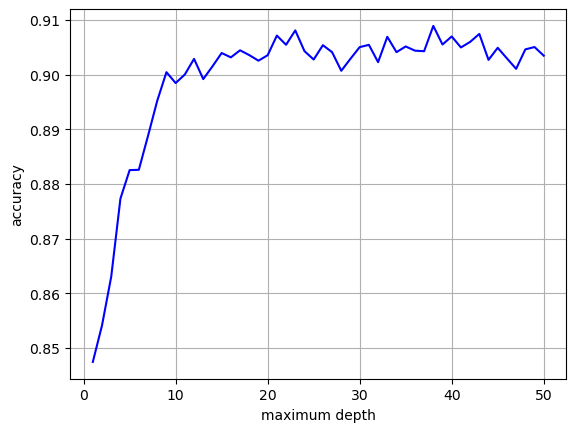

[0.847457627118644, 0.8541530412034009, 0.8630573248407645, 0.8773281952472705, 0.8825438027255029, 0.8825989064007719, 0.888816644993498, 0.8952319169639962, 0.9004554326610279, 0.8984655566438132, 0.9000325626831651, 0.9028905488795064, 0.8991896272285251, 0.9015175976751695, 0.9039584685269305, 0.9031633311814075, 0.9044544867656552, 0.9035794904869396, 0.9025574619618, 0.9035598705501618, 0.9071497897120674, 0.9054662379421222, 0.9080941631731699, 0.9043031470777135, 0.9027688345138442, 0.9053923151436875, 0.9041184041184042, 0.9007092198581561, 0.9029126213592233, 0.9050387596899225, 0.9054533720555017, 0.9022895840051597, 0.9069243156199678, 0.9041184041184042, 0.9051612903225806, 0.904392764857881, 0.9042861746696744, 0.9089153524299968, 0.9055143502096099, 0.9069916613213599, 0.9049773755656109, 0.9059884095299421, 0.90744920993228, 0.9027061855670103, 0.9049159120310478, 0.9029754204398448, 0.9010634869481147, 0.9046233430326545, 0.9050531058899259, 0.9034749034749034]


In [133]:
# max_depths = np.linspace(1, 50, 50)
# print(max_depths)
# f1s = []
# for max_dep in max_depths:
#     clf_RF = RandomForestClassifier(n_estimators=100, max_depth=max_dep)
#     clf_RF.fit(x_train,y_train)
#     y_pred_RF = clf_RF.predict(x_test)
#     f1s.append(f1_score(y_test, y_pred_RF))

# plt.plot(max_depths, f1s, 'b', label="accuracy")
# plt.ylabel('accuracy')
# plt.xlabel('maximum depth')
# plt.grid()
# plt.show()
# print(f1s)

# tmp = max(f1s)
# index = f1s.index(tmp)
# print(index)
# subm = clf_RF.predict(df_validation)
# np.savetxt("submissions.txt", subm.astype(int))

37

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=123,
                                                            shuffle=False, stratify=None)

# le = LabelEncoder()
# le.fit(y_train)
# y_train = le.transform(y_train)
# le.fit(y_test)
# y_test = le.transform(y_test)

# classifier = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True)
# classifier.fit(x_train, y_train)
# y_pred = classifier.predict(x_test)
# f1 = f1_score(y_test, y_pred)
# print(f1)

In [125]:
# subm = classifier.predict(df_validation)
# np.savetxt("submissions.txt", subm.astype(int))

In [155]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=123,
#                                                             shuffle=False, stratify=None)
mlp = MLPClassifier(max_iter=1000)

parameter_space = {
    'hidden_layer_sizes': [(200, 5), (200,50,50), (50,200,50)], 
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [1e-6, 0.05],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV

clf_MLP = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf_MLP.fit(x_train, y_train)

# Best paramete set
print('Best parameters found:\n', clf_MLP.best_params_)

/Users/arvinrastegar/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/arvinrastegar/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/arvinrastegar/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/arvinrastegar/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations 

Best parameters found:
 {'activation': 'tanh', 'alpha': 1e-06, 'hidden_layer_sizes': (200, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}


/Users/arvinrastegar/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [156]:
y_pred = clf_MLP.predict(x_test)
f1 = f1_score(y_test, y_pred)
f1

0.8934399999999999

In [158]:
clf_MLP.fit(x, y)
subm = clf_MLP.predict(df_validation)
np.savetxt("submissions_mlp.txt", subm.astype(int))

/Users/arvinrastegar/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/arvinrastegar/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/arvinrastegar/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/arvinrastegar/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations 

KeyboardInterrupt: 